In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


In [98]:
# Load the dataset from the local path
file_path = r'E:\bank-additional\bank-additional\bank-additional.csv'
df = pd.read_csv(file_path, sep=';')


In [99]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [100]:
df.shape

(4119, 21)

In [101]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [102]:
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [103]:
df.dtypes.value_counts()


object     11
int64       5
float64     5
dtype: int64

In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [105]:
df.duplicated().sum()


0

In [106]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [107]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [108]:
# Describe categorical variables before encoding
print(df.describe(include='object'))


           job  marital          education default housing  loan   contact  \
count     4119     4119               4119    4119    4119  4119      4119   
unique      12        4                  8       3       3     3         2   
top     admin.  married  university.degree      no     yes    no  cellular   
freq      1012     2509               1264    3315    2175  3349      2652   

       month day_of_week     poutcome     y  
count   4119        4119         4119  4119  
unique    10           5            3     2  
top      may         thu  nonexistent    no  
freq    1378         860         3523  3668  


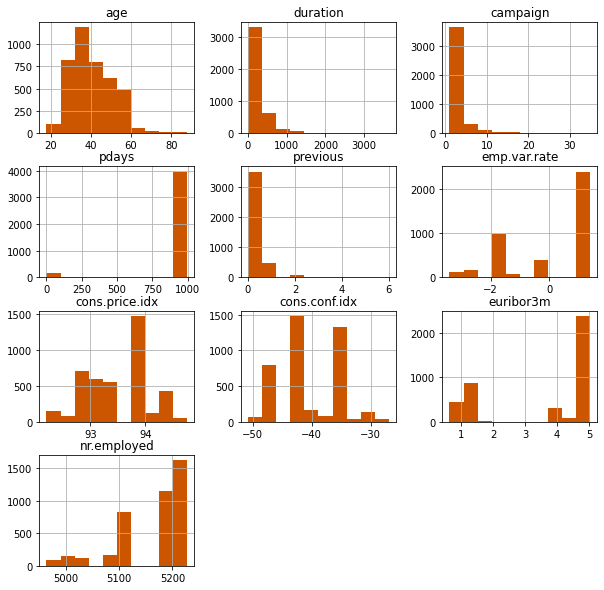

In [109]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

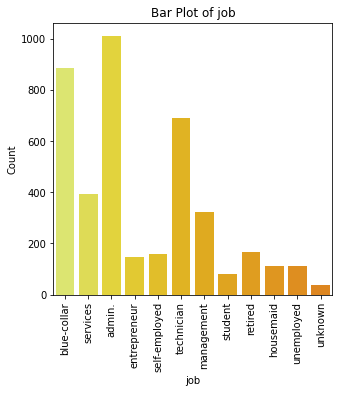

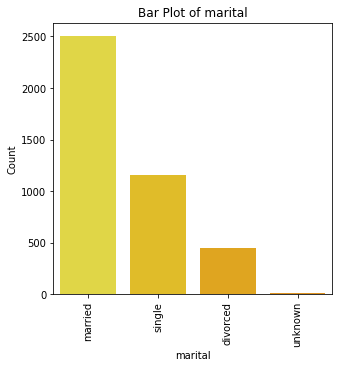

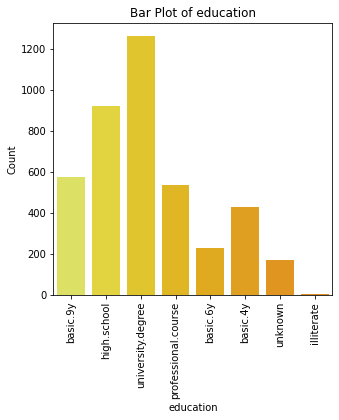

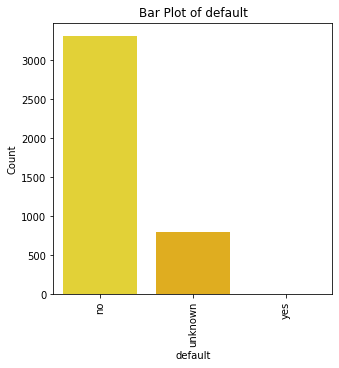

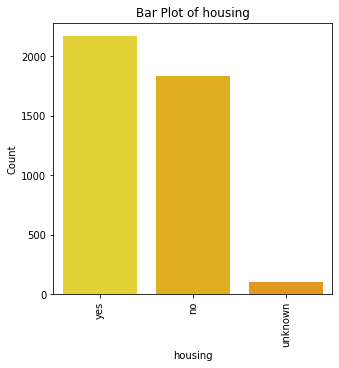

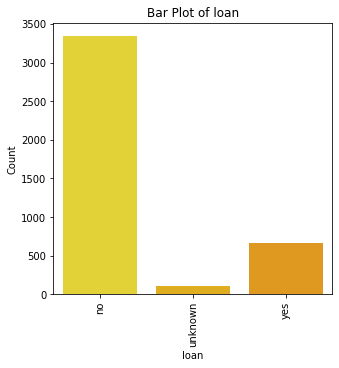

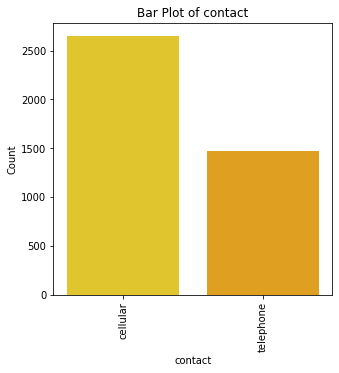

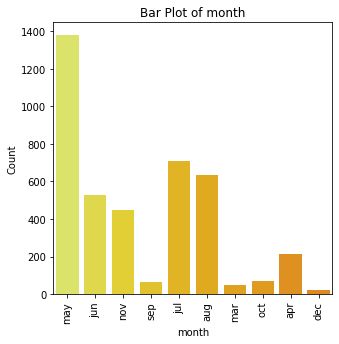

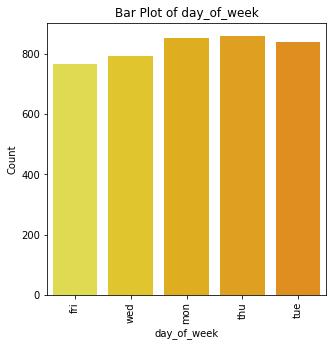

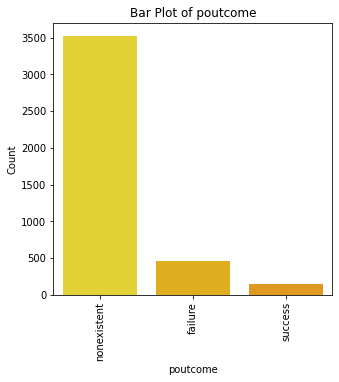

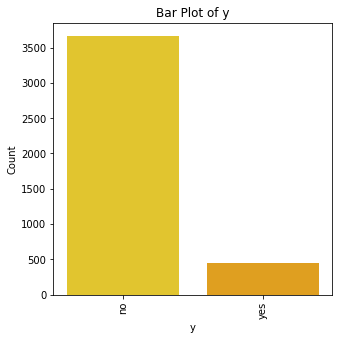

In [110]:
# Store the original categorical columns before encoding
cat_cols = df.select_dtypes(include='object').columns
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


In [111]:
# Convert categorical variables to numerical values
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


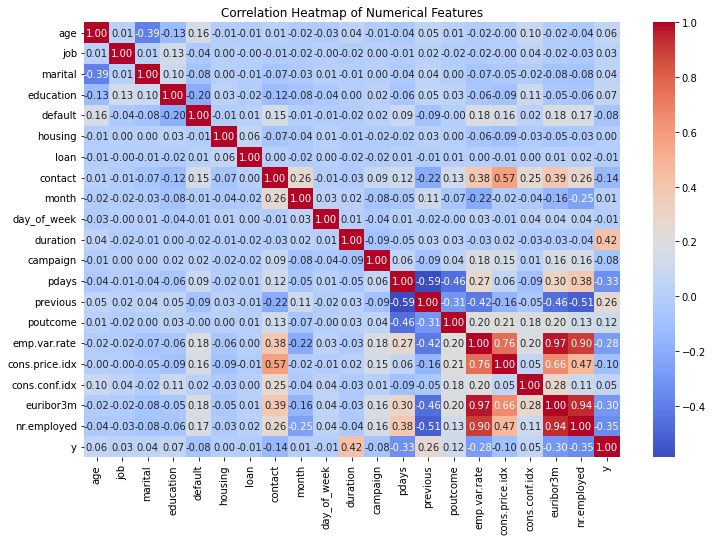

In [112]:
import seaborn as sns
# Plot heatmap of correlations between numerical features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [113]:
# Split the data into features (X) and target (y)
X = df.drop(columns='y')
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [114]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [115]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [116]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1016   89]
 [  57   74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1105
           1       0.45      0.56      0.50       131

    accuracy                           0.88      1236
   macro avg       0.70      0.74      0.72      1236
weighted avg       0.89      0.88      0.89      1236


Accuracy Score: 0.8818770226537217


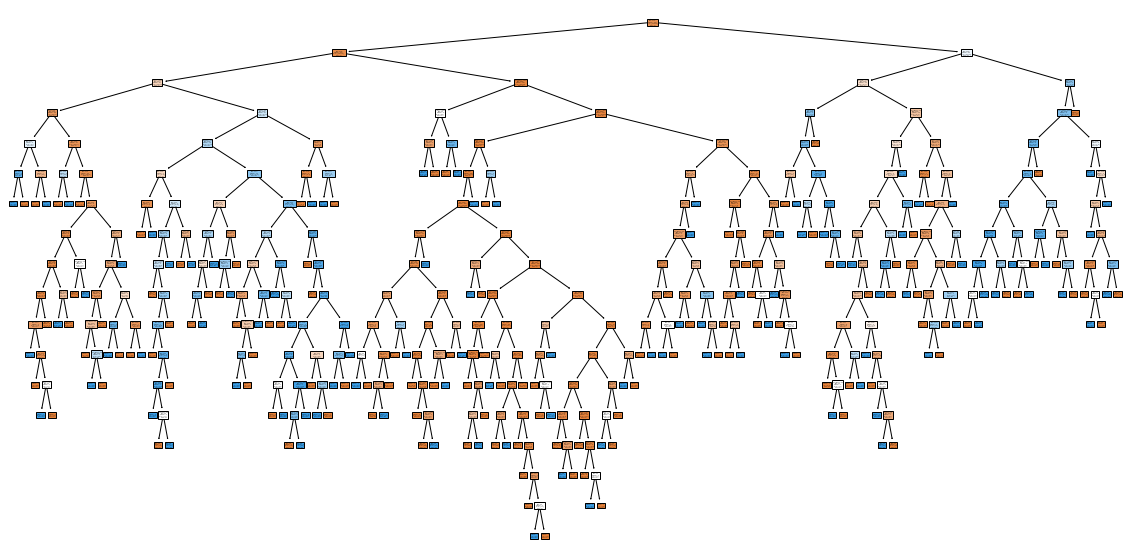

In [120]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()


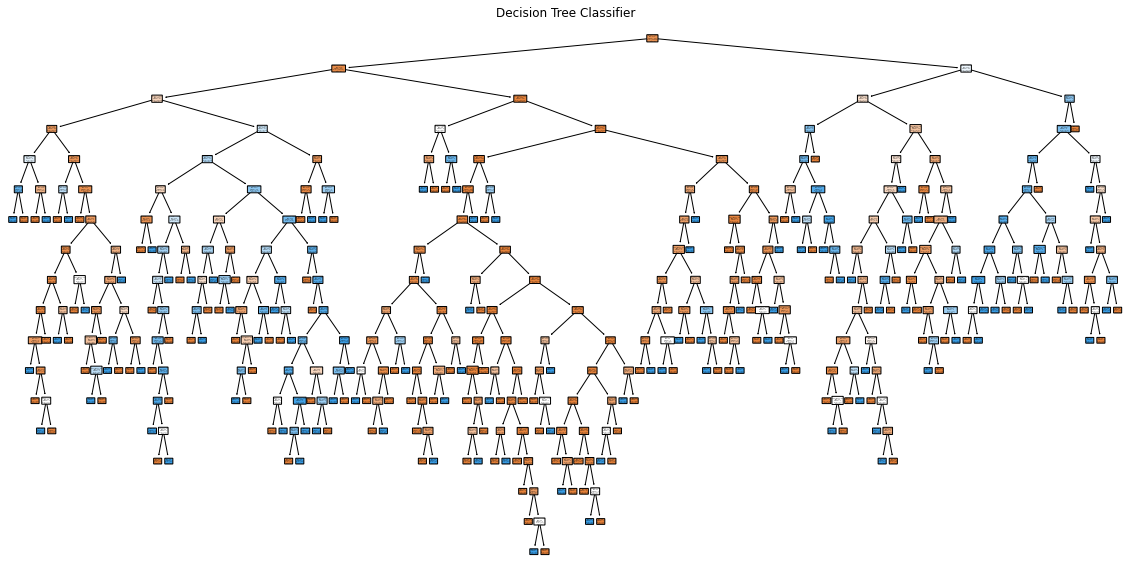

In [118]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, 
               feature_names=X.columns, 
               class_names=['no', 'yes'], 
               filled=True, 
               rounded=True)
plt.title('Decision Tree Classifier')
plt.show()


In [92]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index([], dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [121]:
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [122]:
df.dtypes.value_counts()

int32      11
int64       5
float64     5
dtype: int64

In [127]:
df.duplicated().sum()

0

In [128]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [124]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index([], dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')


In [125]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,3.824958,1.176985,3.780286,0.195436,1.081573,0.348386,0.356154,4.294975,2.009711,...,2.537266,960.422190,0.190337,0.924253,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,3.606319,0.606341,2.149588,0.397196,0.983915,0.741647,0.478920,2.305188,1.389233,...,2.568159,191.922786,0.541788,0.372816,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,3.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,35.000000,999.000000,6.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


                     age       job   marital  education   default   housing  \
age             1.000000  0.014618 -0.393795  -0.125520  0.160562 -0.007279   
job             0.014618  1.000000  0.013616   0.134717 -0.040194  0.002725   
marital        -0.393795  0.013616  1.000000   0.104367 -0.082149  0.002659   
education      -0.125520  0.134717  0.104367   1.000000 -0.200550  0.030291   
default         0.160562 -0.040194 -0.082149  -0.200550  1.000000 -0.011599   
housing        -0.007279  0.002725  0.002659   0.030291 -0.011599  1.000000   
loan           -0.008605 -0.000800 -0.005926  -0.021281  0.007872  0.064208   
contact         0.012700 -0.011981 -0.067432  -0.116686  0.149737 -0.073007   
month          -0.020909 -0.016835 -0.033537  -0.080912 -0.008608 -0.039840   
day_of_week    -0.029297 -0.004120  0.007184  -0.042302 -0.014882  0.012389   
duration        0.041299 -0.016325 -0.005602   0.000016 -0.020449 -0.012226   
campaign       -0.014169  0.002553  0.003015   0.015

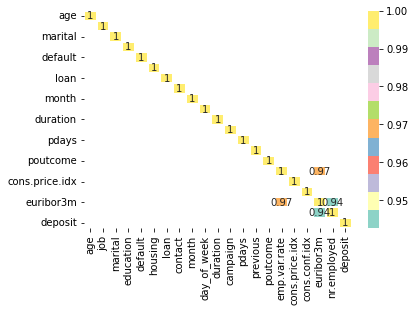

In [133]:
corr = df.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [136]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
df1 = df.copy()
df1.columns





Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [137]:
df1.shape



(4119, 18)

In [135]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,510,0,20,0,1,13,17,0


In [139]:
df_encoded['deposit'].value_counts()

0    3668
1     451
Name: deposit, dtype: int64

In [140]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [141]:
from sklearn.model_selection import train_test_split

print(4119*0.25)

1029.75


In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [143]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [144]:
mscore(dt)

Training Score 0.923276141146002
Testing Score 0.9116504854368932


In [145]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 0 0]


In [146]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9116504854368932
Confusion Matrix
 [[913  17]
 [ 74  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.60      0.26      0.36       100

    accuracy                           0.91      1030
   macro avg       0.76      0.62      0.66      1030
weighted avg       0.89      0.91      0.90      1030



In [147]:
from sklearn.tree import plot_tree
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


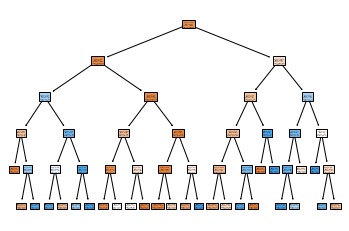

In [148]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [149]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [150]:
mscore(dt1)


Training Score 0.9145354483651668
Testing Score 0.916504854368932


In [151]:
ypred_dt1 = dt1.predict(x_test)

In [152]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.916504854368932
Confusion Matrix
 [[912  18]
 [ 68  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.64      0.32      0.43       100

    accuracy                           0.92      1030
   macro avg       0.79      0.65      0.69      1030
weighted avg       0.90      0.92      0.90      1030



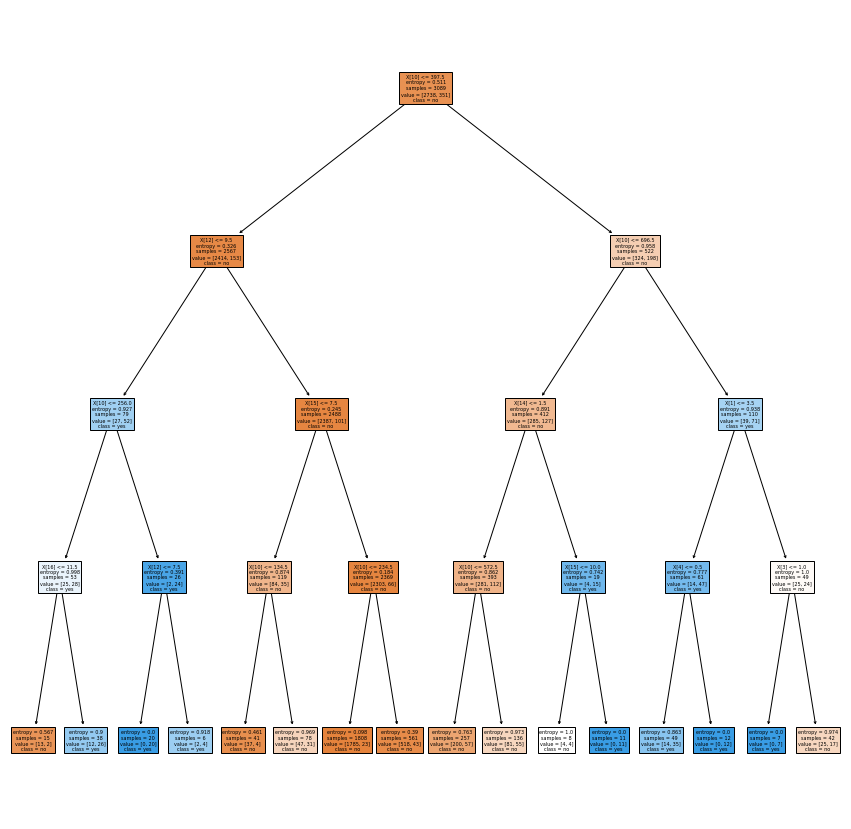

In [153]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()
